# Probability distribution functions
Flora Hess (flora.hess@stud.uni-heidelberg.de)<br/>Leonardo K. Reiter (leonardo.reiter@stud.uni-heidelberg.de)<br/>Jason G. Jun (jun.jasongabriel@stud.uni-heidelberg.de)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams["figure.figsize"] = 10, 10
plt.rcParams["axes.titlesize"] = 20
plt.rcParams["axes.labelsize"] = 10
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.facecolor"] = (0.5, 0.5, 0.5)
plt.rcParams["axes.edgecolor"] = (1.0, 1.0, 1.0)
plt.rcParams["scatter.marker"] = "."
plt.rcParams["lines.linewidth"] = 1
plt.rcParams["grid.color"] = (0.6, 0.6, 0.6)
plt.rcParams["grid.linestyle"] = (3, 1)
plt.rcParams["legend.facecolor"] = (1., 1., 1.)
plt.rcParams["legend.fontsize"] = 7
plt.rcParams["font.family"] = "serif"
plt.rcParams["xtick.bottom"] = False
plt.rcParams["xtick.labelbottom"] = True
plt.rcParams["xtick.labeltop"] = False
plt.rcParams["xtick.labelsize"] = 7.5
plt.rcParams["ytick.labelsize"] = 7.5
plt.rcParams["xtick.top"] = True
plt.rcParams["ytick.labelleft"] = True
plt.rcParams["ytick.left"] = True
# print(plt.rcParams.keys())

Consider a probability distribution function $p(x)$ given in the domain $[0, a\rangle$ by
$$ p(x) = bx$$ Assume that $\lbrace r_i\rbrace$ is a random set of numbers, distributed uniformly between 0 and 1.

## Task 1:
Give the proper value of $b$ as a function of a such that the probability distribution function is properly normalized.

As one can see easily from the condition $$\int_0^a bx \ dx = 1$$ the proper value for $b$ is $b = \frac{2}{a^2}$.

## Task 2:
Use the rejection method to make a set $\lbrace x_i \rbrace$ that obeys the above distribution for $a = 0.5$.<br>
Hint: Use $x_i = ar_i (0 < x_i < a)$. Then use another random number set ${s_i}$, distributed uniformly between $0$ and $1$; use $y_i = p(a)s_i$. We have $0 < y_i < p(a)$ with $p(a) = ab$. Accept $x_i$ in your set ${x_i}$ if $y_i \leq p(x_i)$, otherwise, if $y_i > p(x_i)$, reject it (note $p(x_i) = bx_i$).

In [76]:
a = .5
b = 2 / a**2


def p(x, b):
    return b * x

def sample_x_random(n, a, b):
    x_random = []
    while len(x_random) < n:
        x, y = np.random.uniform(0, a), np.random.uniform(0, a*b)
        if y < p(x, b):
            x_random.append(x)
            print("\r"+f"{len(x_random)/n:7.2%}", end="")
    return np.array(x_random)

n = 10
x_random = sample_x_random(n, a, b)
print(f"\nn = {n}\n[x_i] = {x_random.round(2)}")

100.00%
n = 10
[x_i] = [0.43 0.28 0.36 0.44 0.31 0.43 0.26 0.4  0.33 0.04]


## Task 3:
Make a histogram of the resulting numbers and check that the histogram indeed follows the probability density. Experiment with the size of the set (the number of random numbers drawn), to find out how large you have to make it to get (by eye) a reasonable fit.

100.00%

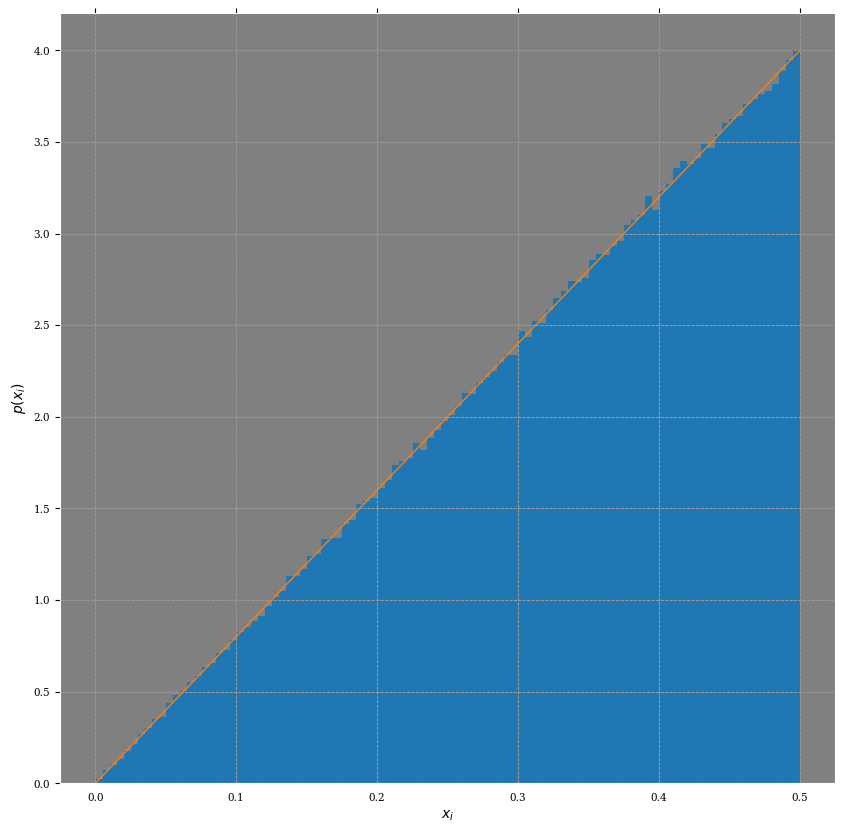

In [78]:
n = 1e6
x_random = sample_x_random(n, a, b)
plt.hist(x_random, density=True, bins=100)
plt.xlabel("$x_i$")
plt.ylabel("$p(x_i)$")
plt.plot((0,a),(0,a*b))
plt.show()

### 4. Compute the number π using a rejection method with the function $f(x) = \sqrt(1 - x^2)$, for $0 \leq x \leq 1$. Hint: It is enough to use only one quadrant $x, f(x) > 0$. Vary the number of RNs widely (orders of magnitude) and plot the accuracy of the result as a function of the number of RNs. Use logarithmic variables for the plot.

In [79]:
def arc(x):
    return np.sqrt(1-x**2)

def random_number_pi(n):
    n = np.round(n, 0)
    N = np.array([0., 0.])
    while N[1] < n:
        x, y = np.random.uniform(0, 1, 2)
        N[int(y<arc(x))] += 1
    pi = N[1] / (N[1]+N[0]) * 4
    print(f"\rn = {n:6.0f}, PI = {pi:.2f}", end="")
    return pi

PI = np.pi
n = 1e4
pi = random_number_pi(n)
print(f"\nnumeric:  {pi}\nconstant: {PI}\nError: {abs(pi-PI)/PI:.2%}")

n =  10000, PI = 3.14
numeric:  3.13996389041526
constant: 3.141592653589793
Error: 0.05%


n =  10000, PI = 3.13

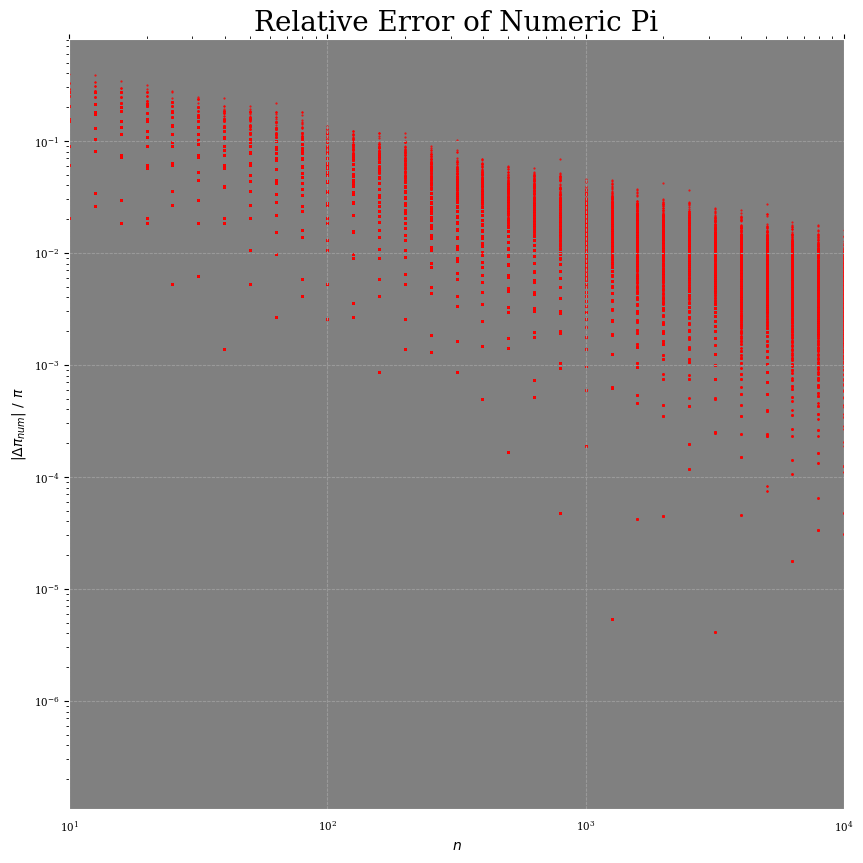

In [105]:
n_min, n_max, c = 1, 4, 1000
n_range = np.logspace(n_min, n_max, (n_max-n_min) * 10 + 1)
for i in range(1, c):
    for n in n_range:
        plt.scatter(n, abs(random_number_pi(n)-PI)/PI, c="r", s=1)
plt.xlim(n_range.min(),n_range.max())
plt.title("Relative Error of Numeric Pi")
plt.xlabel("$n$")
plt.ylabel("$|\Delta\pi_{num}|\ /\ \pi$")
plt.xscale("log")
plt.yscale("log")
plt.show()